In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
from PIL import Image

In [2]:
cifar10 = tf.keras.datasets.cifar10 

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [49]:
y_train.shape 

(50000, 1)

In [52]:
y_train.max()

9

In [22]:
x_train[5].shape

(32, 32, 3)

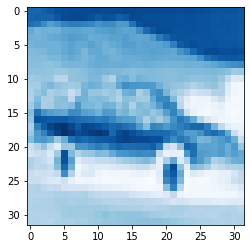

In [27]:
plt.imshow(x_train[4][:,:,2], cmap="Blues") 

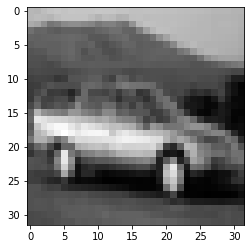

In [33]:
plt.imshow(tf.image.rgb_to_grayscale(x_train[4]).numpy().reshape((32,32)), cmap="gray")

In [40]:
x_train_bw = tf.image.rgb_to_grayscale(x_train)
x_train_bw.shape

TensorShape([50000, 32, 32, 1])

In [63]:
x_test_bw = tf.image.rgb_to_grayscale(x_test)
x_test_bw.shape

TensorShape([10000, 32, 32, 1])

In [41]:
x_train_bw = x_train_bw.numpy()
x_train_bw.shape

(50000, 32, 32, 1)

In [64]:
x_test_bw = x_test_bw.numpy()
x_test_bw.shape

(10000, 32, 32, 1)

In [42]:
x_train_bw = x_train_bw.squeeze()
x_train_bw.shape

(50000, 32, 32)

In [66]:
x_test_bw = x_test_bw.squeeze()
x_test_bw.shape

(10000, 32, 32)

In [45]:
x_train_bw = x_train_bw/x_train_bw.max()

In [48]:
x_train_bw.max() 

1.0

In [67]:
x_test_bw = x_test_bw/x_test_bw.max()
x_test_bw.max()

1.0

In [57]:
fancy_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32)), 
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10), 
    
])
fancy_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 132,490
Trainable params: 132,490
Non-trainable params: 0
_________________________________________________________________


In [60]:
fancy_model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [61]:
fancy_model.fit(x_train_bw, y_train, epochs = 15) 

Epoch 1/15
1563/1563 [==============================] - 3s 1ms/step - loss: 2.1231 - accuracy: 0.2227
Epoch 2/15
1563/1563 [==============================] - 2s 2ms/step - loss: 1.9487 - accuracy: 0.3029
Epoch 3/15
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8834 - accuracy: 0.3267
Epoch 4/15
1563/1563 [==============================] - 2s 2ms/step - loss: 1.8454 - accuracy: 0.3426
Epoch 5/15
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8181 - accuracy: 0.3558
Epoch 6/15
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8055 - accuracy: 0.3568
Epoch 7/15
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7882 - accuracy: 0.3633
Epoch 8/15
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7716 - accuracy: 0.3705
Epoch 9/15
1563/1563 [==============================] - 2s 2ms/step - loss: 1.7527 - accuracy: 0.3807
Epoch 10/15
1563/1563 [==============================] - 2s 1ms/step - loss: 1.751

In [69]:
fancy_model.evaluate(x_test_bw, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.7695 - accuracy: 0.3725


[1.7694849967956543, 0.3725000023841858]

In [6]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(32,32,3)), # coz they required positional params (and not kw arguments)
    tf.keras.layers.MaxPooling2D(pool_size =(2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'), # see whatsapp fren, 64 filters, of size 3 and activation relu 
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
#     tf.keras.layers.MaxPooling2D((2,2)), Just to match the architecture i am refrerring to 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'), # y u confused fren? you said output size is 10 thats next layer
    tf.keras.layers.Dense(10),
])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [8]:
cnn_model.compile(optimizer = 'adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy']) 

In [87]:
cnn_model.fit(x_train, y_train, epochs = 12, validation_split=0.2) 

Epoch 1/12
1250/1250 [==============================] - 32s 25ms/step - loss: 2.6916 - accuracy: 0.2698 - val_loss: 1.6068 - val_accuracy: 0.4181
Epoch 2/12
1250/1250 [==============================] - 32s 25ms/step - loss: 1.4365 - accuracy: 0.4830 - val_loss: 1.2978 - val_accuracy: 0.5394
Epoch 3/12
1250/1250 [==============================] - 30s 24ms/step - loss: 1.2685 - accuracy: 0.5482 - val_loss: 1.3035 - val_accuracy: 0.5480
Epoch 4/12
1250/1250 [==============================] - 33s 26ms/step - loss: 1.1454 - accuracy: 0.5945 - val_loss: 1.2007 - val_accuracy: 0.5800
Epoch 5/12
1250/1250 [==============================] - 32s 26ms/step - loss: 1.0421 - accuracy: 0.6351 - val_loss: 1.1214 - val_accuracy: 0.6153
Epoch 6/12
1250/1250 [==============================] - 31s 25ms/step - loss: 0.9719 - accuracy: 0.6576 - val_loss: 1.0831 - val_accuracy: 0.6305
Epoch 7/12
1250/1250 [==============================] - 34s 27ms/step - loss: 0.8972 - accuracy: 0.6828 - val_loss: 1.1013 -

In [9]:
cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 6ms/step - loss: 27.8475 - accuracy: 0.0996


[27.82270050048828, 0.10080000013113022]

In [92]:
x_test *= 255

In [122]:
cnn_model.layers[2]

In [116]:
f, b = cnn_model.layers[2].get_weights()

In [117]:
f_min, f_max = np.amin(f), np.amax(f)
filters = (f - f_min) / (f_max - f_min)

In [118]:
import seaborn as sns

In [149]:
model2 = tf.keras.Model(inputs=cnn_model.inputs, outputs=cnn_model.layers[1].output)

In [150]:
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13_input (InputLayer) [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [151]:
img = x_train[450].reshape(1,32,32,3)

In [152]:
f = model2.predict(img)

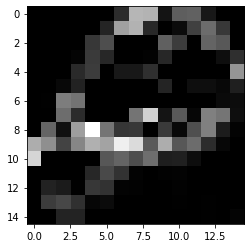

In [162]:
plt.imshow(f[0,:,:,21], cmap="gray")

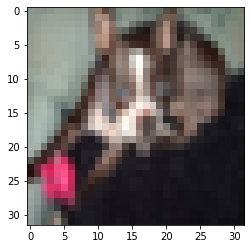

In [161]:
plt.imshow(x_train[450]) 

In [164]:
cnn_model.predict(img).argmax()

5

In [166]:
y_train[450]

array([5], dtype=uint8)

In [167]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [168]:
labels[5]

'dog'

In [29]:
x_train = x_train/255.
x_test= x_test/255.

In [18]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [43]:
cool_model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
tf.nn.relu_11 (TFOpLambda)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                460864    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650 

In [48]:
cool_model.compile(optimizer = 'adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [50]:
cool_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10) # Run itrainn data fren test is for shite c an sie e whatsapp

Epoch 1/10
1563/1563 [==============================] - 28s 17ms/step - loss: 1.7274 - accuracy: 0.3768 - val_loss: 1.2843 - val_accuracy: 0.5489
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.2138 - accuracy: 0.5769 - val_loss: 1.1324 - val_accuracy: 0.6029
Epoch 3/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0724 - accuracy: 0.6280 - val_loss: 1.1321 - val_accuracy: 0.6032
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9945 - accuracy: 0.6576 - val_loss: 1.0680 - val_accuracy: 0.6302
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9338 - accuracy: 0.6779 - val_loss: 1.0610 - val_accuracy: 0.6376
Epoch 6/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8874 - accuracy: 0.6931 - val_loss: 1.0735 - val_accuracy: 0.6375
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8432 - accuracy: 0.7063 - val_loss: 1.0501 -

In [51]:
tfcb = tf.keras.callbacks.TensorBoard(
    log_dir='logs', 
    histogram_freq=1, 
    write_graph=True, 
    write_images=True, 
    update_freq='batch') 
cool_model.fit(x_train, y_train, 
               validation_data = (x_test, y_test),
               epochs = 10,
              callbacks = [tfcb])


Epoch 1/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7101 - accuracy: 0.7508 - val_loss: 1.0864 - val_accuracy: 0.6449
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6759 - accuracy: 0.7659 - val_loss: 1.1092 - val_accuracy: 0.6465
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6486 - accuracy: 0.7737 - val_loss: 1.1561 - val_accuracy: 0.6293
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6171 - accuracy: 0.7845 - val_loss: 1.1797 - val_accuracy: 0.6309
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5861 - accuracy: 0.7939 - val_loss: 1.1910 - val_accuracy: 0.6349
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5587 - accuracy: 0.8043 - val_loss: 1.2390 - val_accuracy: 0.6311
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5380 - accuracy: 0.8125 - val_loss: 1.2384 -

In [35]:

input_layer = tf.keras.Input((32,32,3)) 

l1 = tf.keras.layers.Conv2D(32, 3)(input_layer) 
x = tf.keras.activations.relu(l1) 
x = tf.keras.layers.MaxPooling2D((2,2))(x)
l2 = tf.keras.layers.Conv2D(32, 3)(x) 
x = tf.keras.activations.relu(l2)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
output = tf.keras.layers.Dense(10)(x)

cnn2_model = tf.keras.Model(inputs=input_layer, outputs=output)

In [36]:
cnn2_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
tf.nn.relu_8 (TFOpLambda)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
tf.nn.relu_9 (TFOpLambda)    (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 32)          0   

In [46]:
cnn2_model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [38]:
tfcb = tf.keras.callbacks.TensorBoard(
    log_dir='logs', histogram_freq=1, write_graph=True,
    write_images=True, update_freq='batch', profile_batch=2,
    embeddings_freq=0, embeddings_metadata=None
)
estop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                         patience=1, 
                                         restore_best_weights=True)

checkpoint = tf.keras.callbacks.ModelCheckpoint("saved_cnn_model")
cb = [tfcb,estop,checkpoint]

cnn2_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 30, callbacks=cb)

Epoch 1/30
1563/1563 [==============================] - 38s 24ms/step - loss: 1.7515 - accuracy: 0.3580 - val_loss: 1.2869 - val_accuracy: 0.5356
INFO:tensorflow:Assets written to: saved_cnn_model/assets
Epoch 2/30
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2363 - accuracy: 0.5621 - val_loss: 1.1275 - val_accuracy: 0.5982
INFO:tensorflow:Assets written to: saved_cnn_model/assets
Epoch 3/30
1563/1563 [==============================] - 32s 21ms/step - loss: 1.0698 - accuracy: 0.6219 - val_loss: 1.0699 - val_accuracy: 0.6292
INFO:tensorflow:Assets written to: saved_cnn_model/assets
Epoch 4/30
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9908 - accuracy: 0.6537 - val_loss: 1.0036 - val_accuracy: 0.6516
INFO:tensorflow:Assets written to: saved_cnn_model/assets
Epoch 5/30
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9227 - accuracy: 0.6808 - val_loss: 0.9835 - val_accuracy: 0.6607
INFO:tensorflow:Assets written to: sav

In [39]:
cnn2_model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9766 - accuracy: 0.6665


[0.9766440391540527, 0.6664999723434448]